<a href="https://colab.research.google.com/github/klaasmeinke/CNNs-exoplanet-cartography/blob/main/Earth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
     / 151.5MB 473kB/s
     |████████████████████████████████| 225kB 3.8MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759563 sha256=bf34122f4d24950c55606252bae354ec1d41304ef4937ea02ac023d714c0ea1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-0ue_jg5g/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=c13bcdb5a447eebbe294e20c76186afa617e0f

In [ ]:
if __name__ == "__main__":
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Thesis'

%run Plotting.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Thesis
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Thesis


In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
points = np.load('data/points.npy')
points = cart2geo(points[:,0], points[:,1], points[:,2]).T * 180/np.pi

In [ ]:
types = [bm.is_land(point[0], point[1]) for point in points]
types = np.array(types, dtype = np.int32)

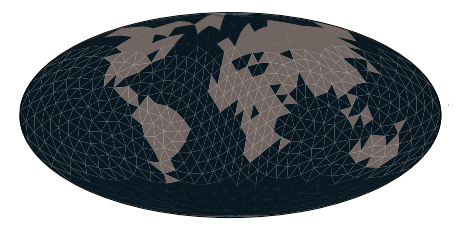

In [ ]:
mollweide(faces, types)

In [ ]:
land_idx = np.where(types == 1)[0]

for ind in land_idx:

    # all faces with lat > 50 are vegetation
    if points[ind, 1] > 50:
        types[ind] = 2

    # south america amazon
    if -65 <= points[ind, 0] <= -35:
        types[ind] = 2

    # north of south america and central america:
    if -10 < points[ind, 1] < 25 and -100 < points[ind, 0] < -30:
        types[ind] = 2

    # east of north america:
    if points[ind, 1] > 0 and -105 < points[ind, 0] < -25:
        types[ind] = 2

    # europe
    if points[ind, 1] > 35 and 0 < points[ind, 0] < 35:
        types[ind] = 2

    # middle of africa
    if -17 < points[ind, 1] < 10 and -14 < points[ind, 0] < 50:
        types[ind] = 2

    # south west africa
    if points[ind, 1] < -10 and 30 < points[ind, 0] < 50:
        types[ind] = 2

    # south china and indonesia:
    if -10 < points[ind, 1] < 30 and 75 < points[ind, 0] < 160:
        types[ind] = 2

    # north chine and japan:
    if points[ind, 1] > 0 and points[ind, 0] > 100:
        types[ind] = 2

    # southeast australia:
    if points[ind, 1] < -25 and points[ind, 0] > 145:
        types[ind] = 2

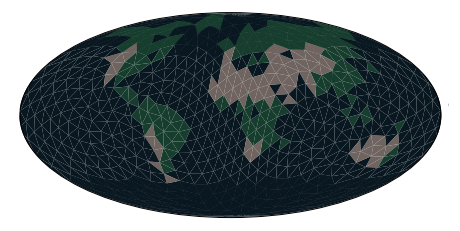

In [ ]:
mollweide(faces, types)

In [ ]:
print('ocean facets:  ', len(np.where(types == 0)[0]))
print('desert facets: ', len(np.where(types == 1)[0]))
print('veget facets:  ', len(np.where(types == 2)[0]))

ocean facets:   741
desert facets:  92
veget facets:   167


In [ ]:
np.save('data/earth_surface_types.npy', types)